In [18]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


## Обработка данных с Твиттера

In [19]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'], encoding='utf-8')
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'], encoding='utf-8')
negative['label'] = ['negative'] * len(negative)
df = positive.append(negative)

In [29]:
df.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


In [30]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

In [22]:
x_train.head()

31157    @Vlad_Stavnichiy двусмысленный вопрос) Это ты ...
63946    Новогоднего настроение абсолютно нет!!!\nНичег...
49439    вот и работай после этого в крупных компаниях(...
26682    @anna_downey_ та я сначала не сразу узнала кто...
81302            Хочу к тебе...но понимаю,что уже нельзя:(
Name: text, dtype: object

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from sklearn.linear_model import LogisticRegression # классификатор
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords
stopW = stopwords.words('russian')

from string import punctuation
punctuation

noise = stopwords.words('russian') + list(punctuation)

In [32]:
from nltk import ngrams

In [33]:
vec = CountVectorizer(ngram_range=(1, 1), stop_words=noise)
bow = vec.fit_transform(x_train) # bow -- bag of words (мешок слов)

In [51]:
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
              precision    recall  f1-score   support

    negative       0.64      0.70      0.67     25880
    positive       0.73      0.68      0.70     30829

    accuracy                           0.68     56709
   macro avg       0.68      0.69      0.68     56709
weighted avg       0.69      0.68      0.69     56709



In [52]:
list(vec.vocabulary_.items())[:10]

[('alexand23542286', 10453),
 ('molnia_me', 58783),
 ('молния', 158796),
 ('pussy', 70670),
 ('riot', 73346),
 ('участники', 228082),
 ('болотного', 106837),
 ('активисты', 98943),
 ('greenpeace', 35329),
 ('попали', 187854)]

In [53]:
freq_dict = vec.vocabulary_
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])

In [54]:

freq_dict_sorted[:10]

[('８d', 242330),
 ('저주인형', 242329),
 ('빅스', 242328),
 ('민호야생일축하해', 242327),
 ('동방신기와10년', 242326),
 ('雪国', 242325),
 ('逃走', 242324),
 ('空気', 242323),
 ('神戸ルミナリエ', 242322),
 ('白川郷', 242321)]

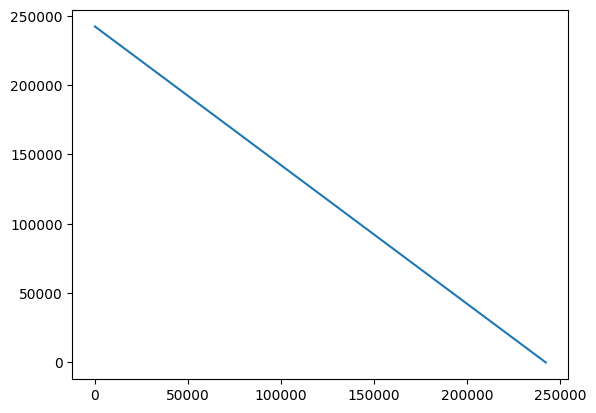

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
first_100_freqs = [freq for word, freq in freq_dict_sorted]
plt.plot(first_100_freqs)
plt.show()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
vec = TfidfVectorizer(ngram_range=(1, 1), stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
              precision    recall  f1-score   support

    negative       0.71      0.76      0.74     26096
    positive       0.79      0.74      0.76     30613

    accuracy                           0.75     56709
   macro avg       0.75      0.75      0.75     56709
weighted avg       0.75      0.75      0.75     56709



In [57]:
len(vec.get_feature_names())

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


243209

Задание 1.
Задание: обучите три классификатора:

1) на токенах с высокой частотой

2) на токенах со средней частотой

3) на токенах с низкой частотой

Сравните полученные результаты, оцените какие токены наиболее важные для классификации.

In [58]:
#Оставим слова которые встретились более чем в 99% документах
vec = TfidfVectorizer(ngram_range=(1, 1),  min_df=0.01, max_df=1., stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.70      0.56      0.62     34871
    positive       0.46      0.61      0.53     21838

    accuracy                           0.58     56709
   macro avg       0.58      0.58      0.57     56709
weighted avg       0.61      0.58      0.58     56709



In [59]:
hi_fr = vec.get_feature_names()
hi_fr

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['co',
 'http',
 'rt',
 'блин',
 'буду',
 'вообще',
 'время',
 'всем',
 'всё',
 'год',
 'делать',
 'день',
 'дома',
 'ещё',
 'завтра',
 'знаю',
 'люблю',
 'могу',
 'новый',
 'очень',
 'пока',
 'почему',
 'просто',
 'сегодня',
 'спасибо',
 'спать',
 'тебе',
 'хочу',
 'это']

In [60]:
len(hi_fr)

29

In [142]:
#Средняя частота
vec = TfidfVectorizer(ngram_range=(1, 1), max_df=0.95, min_df = 2, sublinear_tf=True, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
              precision    recall  f1-score   support

    negative       0.72      0.76      0.74     26407
    positive       0.78      0.74      0.76     30302

    accuracy                           0.75     56709
   macro avg       0.75      0.75      0.75     56709
weighted avg       0.75      0.75      0.75     56709



In [143]:
importance_dict = list(zip(vec.get_feature_names(), clf.coef_[0]))

freq_dict_sorted= sorted(importance_dict, key=lambda x: -x[1])

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Задание 2.
найти фичи с наибольшей значимостью, и вывести их

In [144]:
freq_dict_sorted[:10]

[('dd', 9.251112698485779),
 ('ddd', 7.1359235906565734),
 ('xd', 4.880827022261594),
 ('dddd', 4.853677028711927),
 ('ахаха', 4.680309898954842),
 ('ахахах', 4.676685249182342),
 ('ахах', 4.538053027835103),
 ('спасибо', 4.321350487107642),
 ('приятно', 4.254976437259898),
 ('tukvasociopat', 3.7157535289227868)]

In [63]:
#Низкая частота
vec = TfidfVectorizer(ngram_range=(1, 1), min_df=0., max_df=.001,sublinear_tf=True, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
              precision    recall  f1-score   support

    negative       0.64      0.70      0.67     25880
    positive       0.73      0.68      0.70     30829

    accuracy                           0.68     56709
   macro avg       0.68      0.69      0.68     56709
weighted avg       0.69      0.68      0.69     56709



In [64]:
low_fr= vec.get_feature_names()
len(low_fr)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


242331

In [66]:
importance_dict = list(zip(vec.get_feature_names(), clf.coef_[0]))

freq_dict_sorted= sorted(importance_dict, key=lambda x: -x[1])

In [67]:
freq_dict_sorted[:10]

[('dddd', 5.0577383178550726),
 ('xd', 4.841897364992663),
 ('забавно', 3.547271983847067),
 ('отличного', 3.4978964835879642),
 ('хахаха', 3.3175211979388872),
 ('хочупровестиновогоднююночьвместес', 3.2713717548069887),
 ('хахах', 3.2281736401661854),
 ('ddddd', 3.207334388536594),
 ('ржу', 3.190237626907267),
 ('ахахахаха', 3.1308527601950864)]

Высока частота 0.58
Средняя  0.75
Низкая 0.68

Выводы:
 Высокочастотные слова не несут эмоцианальной окраски.
 Средне и низкочастоные слова значимы. Низкочастотных слов больше и они содержат много мусора. 


Задание 3.
1) сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

2) подобрать оптимальный размер для hashing векторайзера

3) убедиться что для сетки нет переобучения

In [80]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Conv1D, GRU, LSTM, Dropout
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [114]:
from sklearn import model_selection, preprocessing, linear_model

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['text'], df['label'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)


In [115]:
train_x

65181    RT @akilinaserg: Легкость в теле,боль в мышцах...
41322    RT @Jesus_Christ_ru: 10 новогодних блюд, котор...
14830    Бля , где нг отмечать,  с кем ?!  Бляять вообщ...
96868    RT @nabefovih: @StenRostov ))) не, ну реально ...
10483    папа накричал на маму.мама накричала на меня.А...
                               ...                        
93330    я не хочу решать геометрию!(((((\nКто-нибудь к...
13308    Я встретила его сегодня, столько всего случило...
7876     Ура я дома !!! Чертовы понедельники, ненавижу ...
3376     чому всі зарас сплять, і мені немає кому позво...
71805       @igorekarmeets  и не поделился мандаринками :(
Name: text, Length: 170125, dtype: object

In [146]:
pattern = r'[^a-zA-Z0-9]'
def pattern_replacement(ts):
    return re.sub(pattern, ' ', ts)

train_x = train_x.map(pattern_replacement)

In [147]:
train_data = tf.data.Dataset.from_tensor_slices((train_x[:10000], train_y[:10000]))
valid_data = tf.data.Dataset.from_tensor_slices((valid_x[:10000], valid_y[:10000]))

In [148]:
train_data = train_data.batch(16)
valid_data = valid_data.batch(16)

In [149]:
for raw in train_data.take(1):
    pass

In [152]:
#raw

In [137]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

In [138]:
def custom_standardization(input_data):
    
    return input_data

vocab_size = 1000
seq_len = 100

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)

In [139]:
embedding_dim=200

#10*100*200

model = Sequential([
    vectorize_layer,
    Embedding(vocab_size, embedding_dim),
    Conv1D(200, (3)),
    Conv1D(200, (2)),
    GRU(300),
    #GlobalAveragePooling1D(),
    Dense(100, activation='relu'),
    Dense(1)
])

In [140]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [141]:
model.fit(train_data, validation_data=valid_data, epochs=5)

Epoch 1/5
625/625 [==============================] - 232s 368ms/step - loss: 0.6943 - accuracy: 0.4900 - val_loss: 0.6935 - val_accuracy: 0.4943
Epoch 2/5
276/625 [============>.................] - ETA: 1:43 - loss: 0.6938 - accuracy: 0.5054

KeyboardInterrupt: 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=af133a3e-e74e-4642-80b0-22c9c55ad802' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>